In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import os, sys, pickle
from copy import deepcopy
import jp_analysis as analysis
from scipy import optimize

In [2]:
import jp_mpl as jplot

In [3]:
pmt_info = pickle.load(open('/home/jpyanez/snoplus/snoplus_python/pmt_positions.pckl'))

### Loading the MC with GreyDisc

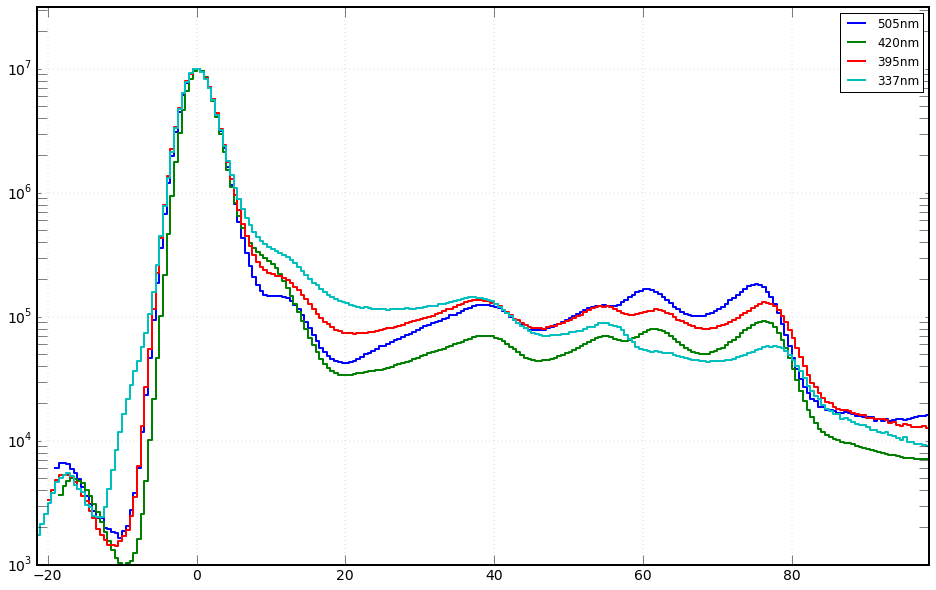

In [11]:
plt.figure(figsize=(16,10))
data_dir = '/home/jpyanez/snoplus/data/SOC_files_reflections/'
myruns = ['17375', '102574','102554','102552']
wlength = ['505nm','420nm','395nm','337nm']

colors = ['b','g','r','c','m','y','sienna','olivedrab','navy','darkorange','teal']

mymax = 10**7
for iRun, run_nr in enumerate(myruns):
    all_files = os.listdir(data_dir)
    file_list = [os.path.join(data_dir,x) for x in all_files if (run_nr in x and 'pckl' in x)]
    for iFile in range(len(file_list)):
        tmp_data = pickle.load(open(file_list[iFile]))
        if iFile == 0:
            data = deepcopy(tmp_data)
        else:
            data['toa_map']+= tmp_data['toa_map']

    data_toa = data['toa_map'].sum(axis=0)

    scale = mymax/data_toa.max()
    
    jplot.unfilledBar(data['time_edges'] - data['time_edges'][data_toa.argmax()], 
                      data_toa*scale, 
                      label=wlength[iRun],
                      color=colors[iRun])
    
plt.yscale('log')
plt.ylim(10**3, 10**7.5)
plt.legend(loc=0)